In [0]:
import pandas as pd

In [69]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,usecols=[1])
df.head(5)

,Passengers
0,112
1,118
2,132
3,129
4,121


In [70]:
x = df.values
x.shape

(144, 1)

In [71]:
x_train_size = int(0.67*(x.shape[0]))
print(x_train_size)
x_train = x[0:x_train_size]
x_test = x[x_train_size:]
x_test.shape

96


(48, 1)

In [0]:
#preprocessing 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
def create_data(x,k):
  x_data = []
  y_data = []
  for i in range(len(x) - k):
    x_curr = x[i:i+k,0]
    y_curr = x[i+k,0]
    x_data.append(x_curr)
    y_data.append(y_curr)
    
  return x_data,y_data

In [74]:
look_back = 12
x_train_data,y_train_data = create_data(x_train,look_back)
x_test_data,y_test_data = create_data(x_test,look_back)
#print(x_train_data.shape)
print(len(x_train_data))

# x_train_data is simply a list
import numpy as np
x_train_data = np.reshape(x_train_data,(len(x_train_data),look_back,1))
x_test_data = np.reshape(x_test_data,(len(x_test_data),look_back,1))
y_train_data = np.reshape(y_train_data,(len(y_train_data),1))
y_test_data = np.reshape(y_test_data,(len(y_test_data),1))
print(x_train_data[0])
print(x_train_data.shape)
print(y_train_data.shape)

84
[[-1.42164592]
 [-1.33777988]
 [-1.14209245]
 [-1.18402547]
 [-1.29584686]
 [-1.10015942]
 [-0.91844966]
 [-0.91844966]
 [-1.08618175]
 [-1.32380221]
 [-1.53346732]
 [-1.33777988]]
(84, 12, 1)
(84, 1)


In [0]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [76]:
model  = Sequential()
model.add(SimpleRNN(4,input_shape=[look_back,1]))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer='adam')

model.fit(x_train_data,y_train_data,epochs = 10,batch_size = 1)

Epoch 1/10
84/84 [==============================] - 1s 6ms/step - loss: 1.8236
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 1.1182
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.6473
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.3724
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.2533
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.2097
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 0.1838
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.1780
Epoch 10/10
84/84 [==============================] - 0s 2ms/step - loss: 0.1706


In [77]:
testPredict = model.predict(x_test_data).ravel()
print(testPredict.shape)
trainPredict = model.predict(x_train_data).ravel()
print(trainPredict.shape)

(36,)
(84,)


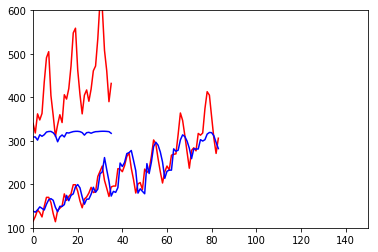

In [103]:
test_results = (sc.inverse_transform(testPredict))
test_actual = sc.inverse_transform(y_test_data)

train_results = (sc.inverse_transform(trainPredict))
train_actual = sc.inverse_transform(y_train_data)

#print(test_results)
#print(test_actual)
#print(train_results)
#print(train_actual)

import matplotlib.pyplot as plt
#combined_results = np.concatenate(train_results,test_results)
#combined_actual = np.concatenate(train_actual,test_actual)

#plt.plot(combined_results,combined_actual)
plt.plot(train_actual,'r',)
plt.plot(test_actual,'r')
plt.axis([0,150,100,600])
plt.plot(train_results,'b')
plt.plot(test_results,'b')
plt.show()